In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/ayushkhaire-mini-projet-ennsemble-trainn/prepareforsttack.csv')
df

,Unnamed: 0,Prediction Date,Best Predicted High,Best Predicted Low,Mean Predicted High,Mean Predicted Low,Actual High,Actual Low,dnn_lstm_low,cnn_lstm_low,gru_lstm_low,dnn_lstm_high,cnn_lstm_high,gnn_lstm_high
0,0,2023-09-26,243.524298,247.372822,246.031300,249.997813,249.550003,241.660004,329.812875,331.741483,333.688736,336.143309,336.905356,339.286071
1,1,2023-09-27,242.948816,246.973522,247.894013,251.837933,245.330002,234.580002,329.812875,331.741483,333.688736,336.143309,336.905356,339.286071
2,2,2023-09-28,241.197914,245.090604,242.106391,245.975829,247.550003,238.649994,329.812875,331.741483,333.688736,336.143309,336.905356,339.286071
3,3,2023-09-29,241.027211,244.968992,240.274971,244.223683,254.770004,246.350006,329.812875,331.741483,333.688736,336.143309,336.905356,339.286071
4,4,2023-10-02,248.182188,252.102951,249.336410,253.175792,254.279999,242.619995,329.812875,331.741483,333.688736,336.143309,336.905356,339.286071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,2024-11-26,338.151869,342.723538,335.568080,340.399791,346.959991,335.660004,329.812875,331.741483,333.688736,336.143309,336.905356,339.286071
296,296,2024-11-27,332.218388,336.668971,331.313192,336.062539,342.549988,326.589996,329.812875,331.741483,333.688736,336.143309,336.905356,339.286071
297,297,2024-11-29,336.298483,340.819505,329.813196,334.670372,345.450012,334.649994,329.812875,331.741483,333.688736,336.143309,336.905356,339.286071
298,298,2024-12-02,341.686976,346.777385,334.165199,338.445733,360.000000,351.149994,329.812875,331.741483,333.688736,336.143309,336.905356,339.286071


In [3]:
ndf = df.drop(columns = ['Unnamed: 0','Prediction Date'])
highdf = ndf[['Best Predicted High', 'Mean Predicted High', 'Actual High', 'dnn_lstm_high', 'cnn_lstm_high', 'gnn_lstm_high']]
lowdf = ndf[['Best Predicted Low', 'Mean Predicted Low', 'Actual Low', 'dnn_lstm_low', 'cnn_lstm_low', 'gru_lstm_low']]

# Train high

In [4]:
highdf = df[['Best Predicted High', 'Mean Predicted High', 'Actual High', 'dnn_lstm_high', 'cnn_lstm_high', 'gnn_lstm_high']]

X = highdf.drop(columns=['Actual High'])  
y = highdf['Actual High']  

# Split the data into training and testing sets (first 290 rows for training, last 10 for testing)
X_train, X_test, y_train, y_test = X[:290], X[290:], y[:290], y[290:]

# Dictionary to store the results
results = {}

# Define the regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'KNN Regressor': KNeighborsRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
}

def calculate_error(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred) 
    mae = mean_absolute_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred) 
    return mse, mae, r2

for model_name, model in regression_models.items():
    mse, mae, r2 = calculate_error(model, X_train, X_test, y_train, y_test)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R²': r2}

for model_name, error in results.items():
    print(f"{model_name}: {error}")

Linear Regression: {'MSE': 197.38218440338423, 'MAE': 13.118024679520891, 'R²': -3.0313778789979153}
Decision Tree Regressor: {'MSE': 82.21977382330242, 'MAE': 6.502999877929693, 'R²': -0.679275049110208}
Random Forest Regressor: {'MSE': 166.27419998335725, 'MAE': 10.83110015869143, 'R²': -2.3960214478682653}
KNN Regressor: {'MSE': 214.7785700415639, 'MAE': 12.876998901367205, 'R²': -3.3866855499929276}
SVR: {'MSE': 9685.878014013997, 'MAE': 98.00125820910367, 'R²': -196.82653881552034}
XGBoost: {'MSE': 85.2701482187027, 'MAE': 6.6582000732421935, 'R²': -0.7415765779814607}


In [5]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'learning_rate': [0.3],
    'max_depth': [6],
    'n_estimators': [50],
    'subsample': [0.8],
    'colsample_bytree': [1.0],
    'gamma': [ 0.2]
}

hxgb = XGBRegressor()

grid_search = GridSearchCV(estimator=hxgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best XGBoost Model - MSE: {mse}, MAE: {mae}, R²: {r2}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.8}
Best XGBoost Model - MSE: 94.08671019068007, MAE: 7.185427856445318, R²: -0.9216480115309333


# Train low

In [6]:
lowdf = ndf[['Best Predicted Low', 'Mean Predicted Low', 'Actual Low', 'dnn_lstm_low', 'cnn_lstm_low', 'gru_lstm_low']]
X = lowdf.drop(columns=['Actual Low'])  
y = lowdf['Actual Low']  

X_train, X_test, y_train, y_test = X[:270], X[270:], y[:270], y[270:]

results = {}

regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'KNN Regressor': KNeighborsRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
}

def calculate_error(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred) 
    mae = mean_absolute_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred) 
    return mse, mae, r2

for model_name, model in regression_models.items():
    mse, mae, r2 = calculate_error(model, X_train, X_test, y_train, y_test)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R²': r2}

for model_name, error in results.items():
    print(f"{model_name}: {error}")

Linear Regression: {'MSE': 262.0680710567844, 'MAE': 13.155204904438921, 'R²': 0.8584358139767307}
Decision Tree Regressor: {'MSE': 3233.123013900236, 'MAE': 46.9189951578776, 'R²': -0.7464715405056479}
Random Forest Regressor: {'MSE': 3182.161770444989, 'MAE': 45.91500166829428, 'R²': -0.7189432463514451}
KNN Regressor: {'MSE': 3430.351493131435, 'MAE': 47.922066548665356, 'R²': -0.8530106126268076}
SVR: {'MSE': 5282.886838101851, 'MAE': 61.755496192691574, 'R²': -1.8537149606709797}
XGBoost: {'MSE': 3303.6166059245124, 'MAE': 47.226087951660155, 'R²': -0.7845508377452219}


In [7]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'learning_rate': [0.3],
    'max_depth': [6],
    'n_estimators': [50],
    'subsample': [0.8],
    'colsample_bytree': [1.0],
    'gamma': [ 0.2]
}

lxgb = XGBRegressor()

grid_search = GridSearchCV(estimator=lxgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best XGBoost Model - MSE: {mse}, MAE: {mae}, R²: {r2}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.8}
Best XGBoost Model - MSE: 3328.212405342694, MAE: 47.324170430501304, R²: -0.797837020644901


In [8]:
X_high = highdf.drop(columns=['Actual High'])  
y_high = highdf['Actual High'] 

hxgb.fit(X_high, y_high)  
hxgb_predictions = hxgb.predict(X_high)
print("HXGB Model Trained - First 5 Predictions:", hxgb_predictions[:5])

X_low = lowdf.drop(columns=['Actual Low'])  
y_low = lowdf['Actual Low'] 

lxgb.fit(X_low, y_low)  
lxgb_predictions = lxgb.predict(X_low)  
print("LXGB Model Trained - First 5 Predictions:", lxgb_predictions[:5])

# Predict using the correct feature set for highdf
hxgb_high = hxgb.predict(X_high)
print("HXGB Predictions (using feature set):", len(hxgb_high))

lxgb_low = lxgb.predict(X_low)
print("LXGB Predictions (using feature set):", len(lxgb_low))

HXGB Model Trained - First 5 Predictions: [249.69795 245.18005 247.75386 253.62367 254.18605]
LXGB Model Trained - First 5 Predictions: [241.69157 234.7007  239.17801 245.44081 242.5461 ]
HXGB Predictions (using feature set): 300
LXGB Predictions (using feature set): 300


In [9]:
resultsdf = df.copy()

resultsdf['xgb high'] = hxgb_high
resultsdf['xgb low'] = lxgb_low
lxgb_low

actual_highs = resultsdf['Actual High']
actual_lows = resultsdf['Actual Low']

# Predicted values for each model
dnn_lstm_low = resultsdf['dnn_lstm_low']
cnn_lstm_low = resultsdf['cnn_lstm_low']
gru_lstm_low = resultsdf['gru_lstm_low']
dnn_lstm_high = resultsdf['dnn_lstm_high']
cnn_lstm_high = resultsdf['cnn_lstm_high']
gru_lstm_high = resultsdf['gnn_lstm_high']
xgb_high = resultsdf['xgb high']
xgb_low = resultsdf['xgb low']
mean_predicted_highs = resultsdf['Mean Predicted High']
mean_predicted_lows = resultsdf['Mean Predicted Low']
weighted_predicted_highs = resultsdf['Best Predicted High']
weighted_predicted_lows = resultsdf['Best Predicted Low']

# Calculate RMSE and MAE for each model prediction (both high and low prices)
def calculate_metrics(actuals, predicted):
    rmse = np.sqrt(mean_squared_error(actuals, predicted))
    mae = mean_absolute_error(actuals, predicted)
    return rmse, mae

rmse_dnn_lstm_high, mae_dnn_lstm_high = calculate_metrics(actual_highs, dnn_lstm_high)
rmse_cnn_lstm_high, mae_cnn_lstm_high = calculate_metrics(actual_highs, cnn_lstm_high)
rmse_gru_lstm_high, mae_gru_lstm_high = calculate_metrics(actual_highs, gru_lstm_high)
rmse_mean_high, mae_mean_high = calculate_metrics(actual_highs, mean_predicted_highs)
rmse_weighted_high, mae_weighted_high = calculate_metrics(actual_highs, weighted_predicted_highs)
rmse_xgb_high, mae_xgb_high = calculate_metrics(actual_highs, xgb_high)

rmse_dnn_lstm_low, mae_dnn_lstm_low = calculate_metrics(actual_lows, dnn_lstm_low)
rmse_cnn_lstm_low, mae_cnn_lstm_low = calculate_metrics(actual_lows, cnn_lstm_low)
rmse_gru_lstm_low, mae_gru_lstm_low = calculate_metrics(actual_lows, gru_lstm_low)
rmse_mean_low, mae_mean_low = calculate_metrics(actual_lows, mean_predicted_lows)
rmse_weighted_low, mae_weighted_low = calculate_metrics(actual_lows, weighted_predicted_lows)
rmse_xgb_low, mae_xgb_low = calculate_metrics(actual_lows, xgb_low)


# Print the results for each model
print("\nRegression Metrics for DNN LSTM Model (High Prices):")
print(f"RMSE: {rmse_dnn_lstm_high:.2f}")
print(f"MAE: {mae_dnn_lstm_high:.2f}")

print("\nRegression Metrics for CNN LSTM Model (High Prices):")
print(f"RMSE: {rmse_cnn_lstm_high:.2f}")
print(f"MAE: {mae_cnn_lstm_high:.2f}")


print("\nRegression Metrics for GRU LSTM Model (High Prices):")
print(f"RMSE: {rmse_gru_lstm_high:.2f}")
print(f"MAE: {mae_gru_lstm_high:.2f}")

print("\nRegression Metrics for Mean Model (High Prices):")
print(f"RMSE: {rmse_mean_high:.2f}")
print(f"MAE: {mae_mean_high:.2f}")

print("\nRegression Metrics for Weighted Model (High Prices):")
print(f"RMSE: {rmse_weighted_high:.2f}")
print(f"MAE: {mae_weighted_high:.2f}")

print("\nRegression Metrics for xgb Model (High Prices):")
print(f"RMSE: {rmse_xgb_high:.2f}")
print(f"MAE: {mae_xgb_high:.2f}")

print("\nRegression Metrics for DNN LSTM Model (Low Prices):")
print(f"RMSE: {rmse_dnn_lstm_low:.2f}")
print(f"MAE: {mae_dnn_lstm_low:.2f}")

print("\nRegression Metrics for CNN LSTM Model (Low Prices):")
print(f"RMSE: {rmse_cnn_lstm_low:.2f}")
print(f"MAE: {mae_cnn_lstm_low:.2f}")

print("\nRegression Metrics for GRU LSTM Model (Low Prices):")
print(f"RMSE: {rmse_gru_lstm_low:.2f}")
print(f"MAE: {mae_gru_lstm_low:.2f}")

print("\nRegression Metrics for Mean Model (Low Prices):")
print(f"RMSE: {rmse_mean_low:.2f}")
print(f"MAE: {mae_mean_low:.2f}")

print("\nRegression Metrics for Weighted Model (Low Prices):")
print(f"RMSE: {rmse_weighted_low:.2f}")
print(f"MAE: {mae_weighted_low:.2f}")

print("\nRegression Metrics for XGB Model (Low Prices):")
print(f"RMSE: {rmse_xgb_low:.2f}")
print(f"MAE: {mae_xgb_low:.2f}")


Regression Metrics for DNN LSTM Model (High Prices):
RMSE: 119.69
MAE: 112.92

Regression Metrics for CNN LSTM Model (High Prices):
RMSE: 120.40
MAE: 113.61

Regression Metrics for GRU LSTM Model (High Prices):
RMSE: 122.62
MAE: 115.77

Regression Metrics for Mean Model (High Prices):
RMSE: 18.99
MAE: 14.68

Regression Metrics for Weighted Model (High Prices):
RMSE: 13.69
MAE: 10.67

Regression Metrics for xgb Model (High Prices):
RMSE: 0.60
MAE: 0.42

Regression Metrics for DNN LSTM Model (Low Prices):
RMSE: 121.43
MAE: 114.80

Regression Metrics for CNN LSTM Model (Low Prices):
RMSE: 123.24
MAE: 116.60

Regression Metrics for GRU LSTM Model (Low Prices):
RMSE: 125.08
MAE: 118.42

Regression Metrics for Mean Model (Low Prices):
RMSE: 16.07
MAE: 12.50

Regression Metrics for Weighted Model (Low Prices):
RMSE: 12.41
MAE: 9.69

Regression Metrics for XGB Model (Low Prices):
RMSE: 0.65
MAE: 0.41


# overall test

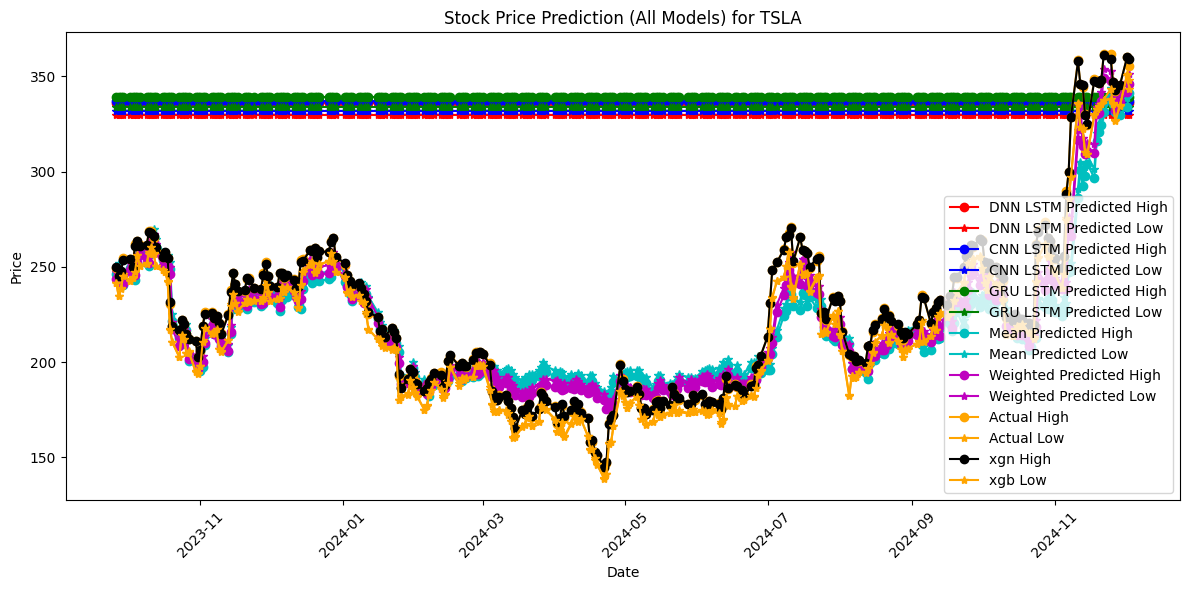

In [10]:
resultsdf['Prediction Date'] = pd.to_datetime(resultsdf['Prediction Date'])

plt.figure(figsize=(12, 6))

# Plot for DNN LSTM Model
plt.plot(resultsdf['Prediction Date'], resultsdf['dnn_lstm_high'], label="DNN LSTM Predicted High", color='r', marker='o')
plt.plot(resultsdf['Prediction Date'], resultsdf['dnn_lstm_low'], label="DNN LSTM Predicted Low", color='r', marker='*')

# Plot for CNN LSTM Model
plt.plot(resultsdf['Prediction Date'], resultsdf['cnn_lstm_high'], label="CNN LSTM Predicted High", color='b', marker='o')
plt.plot(resultsdf['Prediction Date'], resultsdf['cnn_lstm_low'], label="CNN LSTM Predicted Low", color='b', marker='*')


# Plot for GRU LSTM Model
plt.plot(resultsdf['Prediction Date'], resultsdf['gnn_lstm_high'], label="GRU LSTM Predicted High", color='g', marker='o')
plt.plot(resultsdf['Prediction Date'], resultsdf['gru_lstm_low'], label="GRU LSTM Predicted Low", color='g', marker='*')

# Plot for Mean Model
plt.plot(resultsdf['Prediction Date'], resultsdf['Mean Predicted High'], label="Mean Predicted High", color='c', marker='o')
plt.plot(resultsdf['Prediction Date'], resultsdf['Mean Predicted Low'], label="Mean Predicted Low", color='c', marker='*')

# Plot for Weighted Model
plt.plot(resultsdf['Prediction Date'], resultsdf['Best Predicted High'], label="Weighted Predicted High", color='m', marker='o')
plt.plot(resultsdf['Prediction Date'], resultsdf['Best Predicted Low'], label="Weighted Predicted Low", color='m', marker='*')

# Plot for Actual High and Low
plt.plot(resultsdf['Prediction Date'], resultsdf['Actual High'], label="Actual High", color='orange', marker='o')
plt.plot(resultsdf['Prediction Date'], resultsdf['Actual Low'], label="Actual Low", color='orange', marker='*')

# Plot for xgb High and Low
plt.plot(resultsdf['Prediction Date'], resultsdf['xgb high'], label="xgn High", color='black', marker='o')
plt.plot(resultsdf['Prediction Date'], resultsdf['xgb low'], label="xgb Low", color='orange', marker='*')

plt.title(f"Stock Price Prediction (All Models) for TSLA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()

plt.show()

# mass test

In [11]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Initialize XGBoost models
hxgb = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=50, subsample=0.8, colsample_bytree=1.0, gamma=0.2)
lxgb = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=50, subsample=0.8, colsample_bytree=1.0, gamma=0.2)

# Create an empty list to collect predictions
predictions_list = []

for i in range(30):
    # Training and Test split for high predictions
    X_high_train = highdf.drop(columns=['Actual High']).iloc[:270 + i]
    y_high_train = highdf['Actual High'].iloc[:270 + i]
    X_high_test = highdf.drop(columns=['Actual High']).iloc[270 + i:271 + i]

    # Training and Test split for low predictions
    X_low_train = lowdf.drop(columns=['Actual Low']).iloc[:270 + i]
    y_low_train = lowdf['Actual Low'].iloc[:270 + i]
    X_low_test = lowdf.drop(columns=['Actual Low']).iloc[270 + i:271 + i]

    # Train models
    hxgb.fit(X_high_train, y_high_train)
    lxgb.fit(X_low_train, y_low_train)

    # Predict next day's high and low
    high_prediction = hxgb.predict(X_high_test)[0]
    low_prediction = lxgb.predict(X_low_test)[0]

    # Append prediction results to the list
    predictions_list.append({
        'Date': highdf.index[270 + i],  # Adjust if using a different index or column for dates
        'Predicted High': high_prediction,
        'Actual High': highdf['Actual High'].iloc[270 + i],
        'Predicted Low': low_prediction,
        'Actual Low': lowdf['Actual Low'].iloc[270 + i]
    })

# Convert the list of predictions into a DataFrame
predictions_df = pd.DataFrame(predictions_list)

# Calculate and print performance metrics
mse_high = mean_squared_error(predictions_df['Actual High'], predictions_df['Predicted High'])
mae_high = mean_absolute_error(predictions_df['Actual High'], predictions_df['Predicted High'])
r2_high = r2_score(predictions_df['Actual High'], predictions_df['Predicted High'])
rmse_high = np.sqrt(mse_high)

mse_low = mean_squared_error(predictions_df['Actual Low'], predictions_df['Predicted Low'])
mae_low = mean_absolute_error(predictions_df['Actual Low'], predictions_df['Predicted Low'])
r2_low = r2_score(predictions_df['Actual Low'], predictions_df['Predicted Low'])
rmse_low = np.sqrt(mse_low)

print(f"High Predictions - MSE: {mse_high}, MAE: {mae_high}, R²: {r2_high} RMSE {rmse_high}")
print(f"Low Predictions - MSE: {mse_low}, MAE: {mae_low}, R²: {r2_low} RMSE {rmse_low}")

# Display the predictions DataFrame
predictions_df

High Predictions - MSE: 492.66176565633316, MAE: 13.804256693522138, R²: 0.7698196596476496 RMSE 22.19598534997564
Low Predictions - MSE: 345.85372562534957, MAE: 11.618422953287766, R²: 0.8131763974381334 RMSE 18.597142942542266


,Date,Predicted High,Actual High,Predicted Low,Actual Low
0,270,225.166992,218.220001,212.573013,215.259995
1,271,228.011795,218.720001,219.254333,212.110001
2,272,231.623337,262.119995,223.918457,242.649994
3,273,256.740082,269.489990,240.823318,255.320007
4,274,256.052765,273.540009,248.466858,262.239990
5,275,265.257019,264.980011,253.425644,255.509995
6,276,266.089478,263.350006,254.996323,255.820007
7,277,253.073105,259.750000,251.781662,249.250000
8,278,265.678406,254.000000,252.768616,246.630005
9,279,260.960754,248.899994,247.457962,238.880005


/tmp/ipykernel_17/599040639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_30_rows['Prediction Date'] = pd.to_datetime(last_30_rows['Prediction Date'])


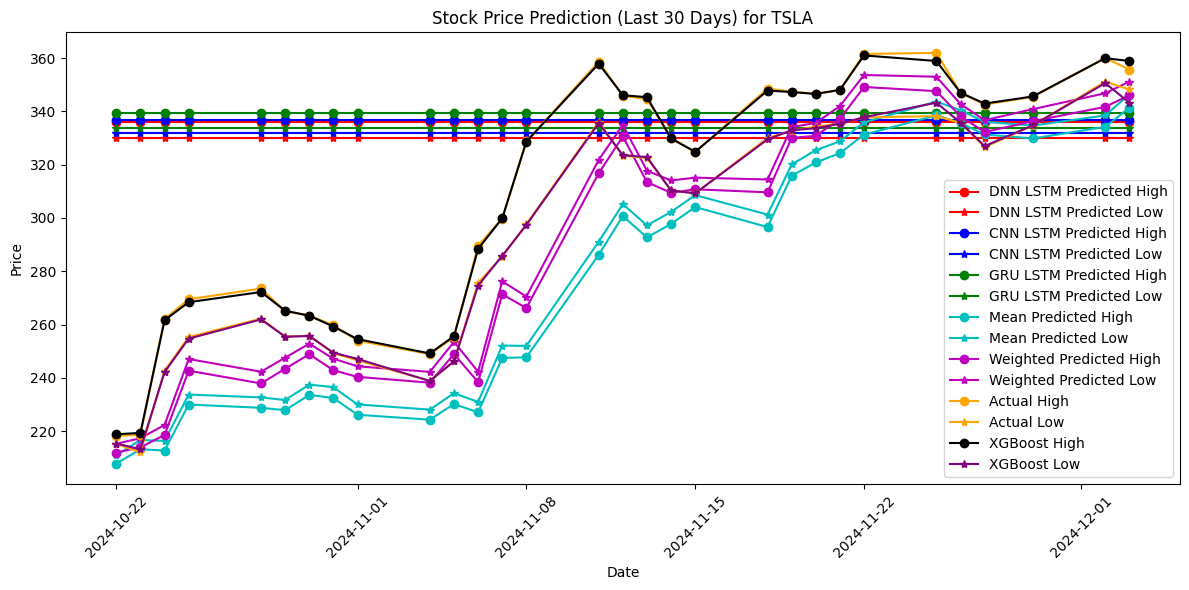

In [12]:
# Assuming `resultsdf` already contains the predictions and actual values for 30 samples
# Filter the last 30 rows
last_30_rows = resultsdf.tail(30)

# Ensure the 'Prediction Date' is in datetime format
last_30_rows['Prediction Date'] = pd.to_datetime(last_30_rows['Prediction Date'])

# Plot configuration
plt.figure(figsize=(12, 6))

# Plot for DNN LSTM Model
plt.plot(last_30_rows['Prediction Date'], last_30_rows['dnn_lstm_high'], label="DNN LSTM Predicted High", color='r', marker='o')
plt.plot(last_30_rows['Prediction Date'], last_30_rows['dnn_lstm_low'], label="DNN LSTM Predicted Low", color='r', marker='*')

# Plot for CNN LSTM Model
plt.plot(last_30_rows['Prediction Date'], last_30_rows['cnn_lstm_high'], label="CNN LSTM Predicted High", color='b', marker='o')
plt.plot(last_30_rows['Prediction Date'], last_30_rows['cnn_lstm_low'], label="CNN LSTM Predicted Low", color='b', marker='*')

# Plot for GRU LSTM Model
plt.plot(last_30_rows['Prediction Date'], last_30_rows['gnn_lstm_high'], label="GRU LSTM Predicted High", color='g', marker='o')
plt.plot(last_30_rows['Prediction Date'], last_30_rows['gru_lstm_low'], label="GRU LSTM Predicted Low", color='g', marker='*')

# Plot for Mean Model
plt.plot(last_30_rows['Prediction Date'], last_30_rows['Mean Predicted High'], label="Mean Predicted High", color='c', marker='o')
plt.plot(last_30_rows['Prediction Date'], last_30_rows['Mean Predicted Low'], label="Mean Predicted Low", color='c', marker='*')

# Plot for Weighted Model
plt.plot(last_30_rows['Prediction Date'], last_30_rows['Best Predicted High'], label="Weighted Predicted High", color='m', marker='o')
plt.plot(last_30_rows['Prediction Date'], last_30_rows['Best Predicted Low'], label="Weighted Predicted Low", color='m', marker='*')

# Plot for Actual High and Low
plt.plot(last_30_rows['Prediction Date'], last_30_rows['Actual High'], label="Actual High", color='orange', marker='o')
plt.plot(last_30_rows['Prediction Date'], last_30_rows['Actual Low'], label="Actual Low", color='orange', marker='*')

# Plot for XGBoost High and Low
plt.plot(last_30_rows['Prediction Date'], last_30_rows['xgb high'], label="XGBoost High", color='black', marker='o')
plt.plot(last_30_rows['Prediction Date'], last_30_rows['xgb low'], label="XGBoost Low", color='purple', marker='*')

# Add plot details
plt.title(f"Stock Price Prediction (Last 30 Days) for TSLA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()